In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
from IPython.display import IFrame
import datetime
from geopy.geocoders import Nominatim

In [3]:
df = pd.read_csv('protests.csv')
df

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1


In [4]:
df["id"] = df.index + 1
df.set_index("id")

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
id,,,,,,,,
1,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
2,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
3,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
4,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
5,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
...,...,...,...,...,...,...,...,...
32519,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3
32520,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1
32521,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1


In [5]:
df.describe()

,Attendees,Total Articles,id
count,20398.000000,32523.000000,32523.000000
mean,708.660408,2.797589,16262.000000
std,9904.943929,11.095795,9388.725739
min,0.000000,1.000000,1.000000
25%,30.000000,1.000000,8131.500000
50%,100.000000,1.000000,16262.000000
75%,200.000000,2.000000,24392.500000
max,725000.000000,923.000000,32523.000000


In [6]:
df = df.rename(columns={'Total Articles': 'Total_Articles', 'Event (legacy; see tags)': 'Protest_Theme'})
df

,Date,Location,Attendees,Protest_Theme,Tags,Curated,Source,Total_Articles,id
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,2
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,3
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,4
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,5
...,...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3,32519
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1,32520
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1,32521
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1,32522


In [7]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
#extract the year in a separate column
df

,Date,Location,Attendees,Protest_Theme,Tags,Curated,Source,Total_Articles,id,Year
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1,1,2017
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,2,2017
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,3,2017
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,4,2017
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,5,2017
...,...,...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3,32519,2020
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1,32520,2020
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1,32521,2020
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1,32522,2020


In [8]:
cols = list(df.columns.values)
df_1 = df[['id','Year','Date','Location','Attendees','Protest_Theme','Tags','Total_Articles','Curated','Source']]
df_1

,id,Year,Date,Location,Attendees,Protest_Theme,Tags,Total_Articles,Curated,Source
0,1,2017,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,1,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...
1,2,2017,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,4,Yes,http://www.johnsoncitypress.com/Local/2017/01/...
2,3,2017,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,1,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...
3,4,2017,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,1,Yes,http://www.cincinnati.com/picture-gallery/news...
4,5,2017,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,1,Yes,http://www.realhartford.org/2017/01/19/reprodu...
...,...,...,...,...,...,...,...,...,...,...
32518,32519,2020,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,3,Yes,https://www.courant.com/coronavirus/hc-news-co...
32519,32520,2020,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,1,Yes,https://www.nj.com/education/2020/08/teachers-...
32520,32521,2020,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,1,Yes,https://www.pix11.com/news/local-news/nj-stude...
32521,32522,2020,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,1,Yes,https://www.gloucestertimes.com/news/local_new...


In [9]:
filtered_df = df_1.dropna(how='any',
                          subset=['Attendees', 'Total_Articles'])

In [10]:
filtered_df['Date'] = pd.to_datetime(df_1['Date'], errors = 'ignore')

<ipython-input-10-2e61d46eef4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(df_1['Date'], errors = 'ignore')


In [11]:
filtered_df.info()
filtered_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20398 entries, 0 to 32522
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20398 non-null  int64         
 1   Year            20398 non-null  int64         
 2   Date            20398 non-null  datetime64[ns]
 3   Location        20398 non-null  object        
 4   Attendees       20398 non-null  float64       
 5   Protest_Theme   20398 non-null  object        
 6   Tags            20398 non-null  object        
 7   Total_Articles  20398 non-null  int64         
 8   Curated         20398 non-null  object        
 9   Source          20398 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ MB


,id,Year,Date,Location,Attendees,Protest_Theme,Tags,Total_Articles,Curated,Source
0,1,2017,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,1,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...
1,2,2017,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,4,Yes,http://www.johnsoncitypress.com/Local/2017/01/...
2,3,2017,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,1,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...
4,5,2017,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,1,Yes,http://www.realhartford.org/2017/01/19/reprodu...
8,9,2017,2017-01-20,"Westlake Park, Seattle, WA",100.0,Executive,Executive; Against president,1,Yes,https://www.seattletimes.com/seattle-news/nort...
...,...,...,...,...,...,...,...,...,...,...
32516,32517,2020,2020-08-19,"State House, Boston, MA",100.0,Education,Education; Healthcare; Against hazardous condi...,3,Yes,https://www.wcvb.com/article/massachusetts-tea...
32518,32519,2020,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,3,Yes,https://www.courant.com/coronavirus/hc-news-co...
32519,32520,2020,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,1,Yes,https://www.nj.com/education/2020/08/teachers-...
32520,32521,2020,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,1,Yes,https://www.pix11.com/news/local-news/nj-stude...


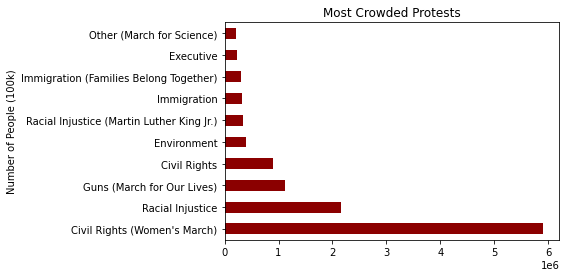

In [12]:
df_plot = filtered_df.groupby('Protest_Theme')['Attendees'].sum().nlargest(n=10)\
.plot(kind = 'barh', color = 'darkred', title = 'Most Crowded Protests')
df_plot.set_ylabel("Number of People (100k)");
#at this point, to be more accurate, we can use a visualization from Flourish
#I've already created this visualization so don't worry

In [13]:
IFrame(
    "https://public.flourish.studio/visualisation/8287858/",
    width = "1000",
    height = "650"
)

When did Indianapolis attract the larger number of attendees?

In [14]:
in_df = filtered_df[filtered_df['Location'] == 'Indianapolis, IN']

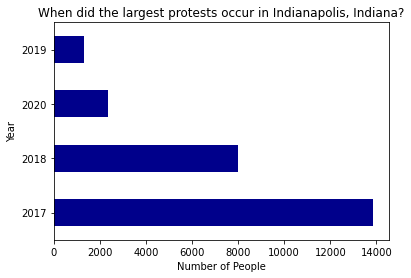

In [15]:
in_plot = in_df.groupby('Year')['Attendees'].sum().nlargest()\
.plot(kind = 'barh', color = 'darkblue', title = 'When did the largest protests occur in Indianapolis, Indiana?')
in_plot.set_xlabel("Number of People")
in_plot.set_ylabel("Year");

And now that we know when the biggest protest happended in Indianapolis. Let's see what was the reason. Given the first horizontal bar plot about protest themes and the number of attendees they were gathered there is a high chance to be **"Civil Rights(Women's March)"**.

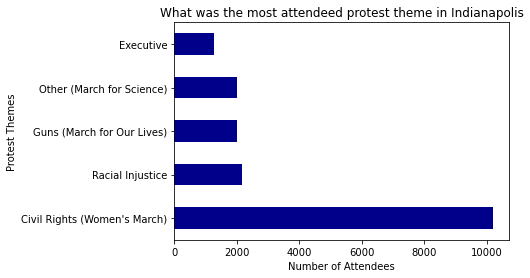

In [16]:
in_plot1 = in_df.groupby("Protest_Theme")["Attendees"].sum().nlargest()\
.plot(kind = "barh", color = "darkblue", title = "What was the most attendeed protest theme in Indianapolis")
in_plot1.set_xlabel("Number of Attendees")
in_plot1.set_ylabel("Protest Themes");

In [17]:
from geopy.geocoders import Nominatim
loc = Nominatim(user_agent="GetLoc", timeout= 100)
long_list = []
lat_list = []

geo_df = filtered_df.head(1000) # take less - huge csv to wait for all while debuging :)

for my_loc in geo_df['Location']:
    getLoc = loc.geocode(my_loc)
    my_lat = 0.0
    my_long = 0.0
    if getLoc is not None:
        #print(getLoc,"\t|","Latitude = ", getLoc.latitude,"\t|", "Longitude = ", getLoc.longitude, "\n")
        my_lat = getLoc.latitude
        my_long = getLoc.longitude
    
    long_list.append(my_long)
    lat_list.append(my_lat)

#print(len(long_list))
geo_df = geo_df.assign(Latitude=lat_list, Longitude=long_list)

In [18]:
geo_df = geo_df[['id','Year','Date','Location','Longitude','Latitude',\
                        'Attendees','Protest_Theme','Tags',\
                        'Total_Articles','Curated','Source']]

In [19]:
df_geoloc = geo_df[(geo_df.Longitude != 0.000000) & (geo_df.Latitude != 0.000000)]

In [20]:
df_geoloc.to_csv('df_with_coordinates.csv', encoding='utf-8')
#run this line only if you want to store the filtered Data Frame
#order of columns is re-aranged
#new column with years was created
#id column was added
#removal of null values from numeric data type columns
#data type of the column Dates was converted to datetime